# code

In [2]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the data
url = 'https://raw.githubusercontent.com/404reese/ML-projects/main/Page%20View%20Time%20Series%20Visualizer/fcc-forum-pageviews.csv'
df = pd.read_csv(url)
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

In [4]:
# Clean the data
df_filtered = df[(df['value'] > df['value'].quantile(0.025)) & (df['value'] < df['value'].quantile(0.975))]

In [5]:
# Create a draw_line_plot function
def draw_line_plot():
    df_copy = df_filtered.copy()
    plt.figure(figsize=(10, 6))
    plt.plot(df_copy.index, df_copy['value'])
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    plt.xlabel('Date')
    plt.ylabel('Page Views')
    plt.savefig('line_plot.png')
    plt.show()

In [6]:
# Create a draw_bar_plot function
def draw_bar_plot():
    df_copy = df_filtered.copy()
    df_copy.reset_index(inplace=True)
    df_copy['year'] = df_copy['date'].dt.year
    df_copy['month'] = df_copy['date'].dt.month
    df_monthly_avg = df_copy.groupby(['year', 'month'])['value'].mean().unstack()
    plt.figure(figsize=(10, 6))
    df_monthly_avg.plot(kind='bar')
    plt.title('Average Daily Page Views by Month')
    plt.xlabel('Years')
    plt.ylabel('Average Page Views')
    plt.legend(title='Months')
    plt.savefig('bar_plot.png')
    plt.show()

In [12]:
# Create a draw_box_plot function
def draw_box_plot():
    df_copy = df_filtered.copy()
    df_copy.reset_index(inplace=True)
    df_copy['year'] = df_copy['date'].dt.year
    df_copy['month'] = df_copy['date'].dt.month
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='year', y='value', data=df_copy)
    plt.title('Year-wise Box Plot (Trend)')
    plt.xlabel('Year')
    plt.ylabel('Page Views')
    plt.savefig('box_plot_year.png')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(x='month', y='value', data=df_copy)
    plt.title('Month-wise Box Plot (Seasonality)')
    plt.xlabel('Month')
    plt.ylabel('Page Views')
    plt.savefig('box_plot_month.png')
    plt.show()

# Plots

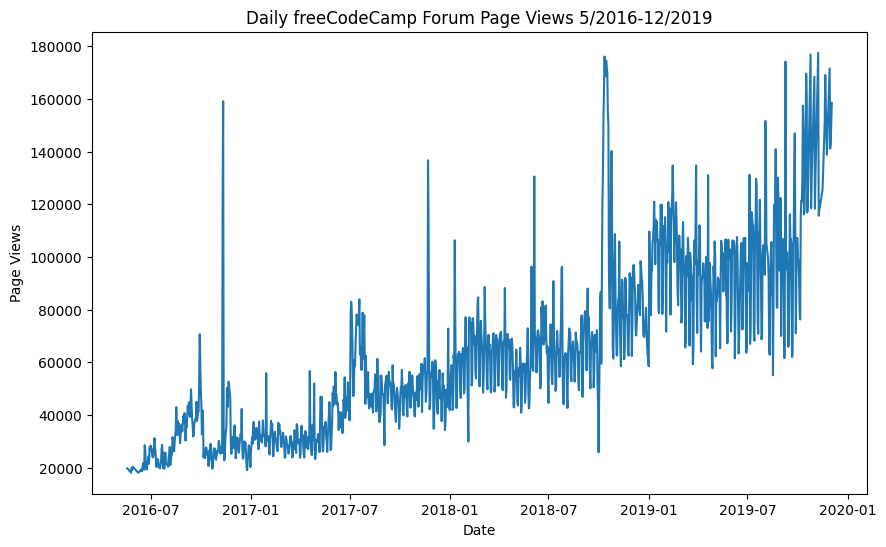

In [13]:
# Run the functions
draw_line_plot()

<Figure size 1000x600 with 0 Axes>

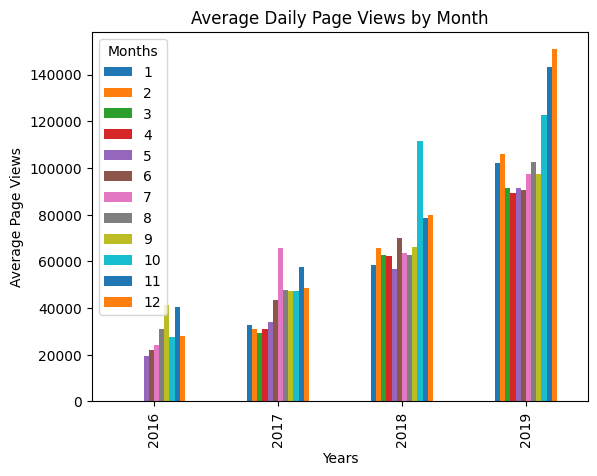

In [14]:
draw_bar_plot()

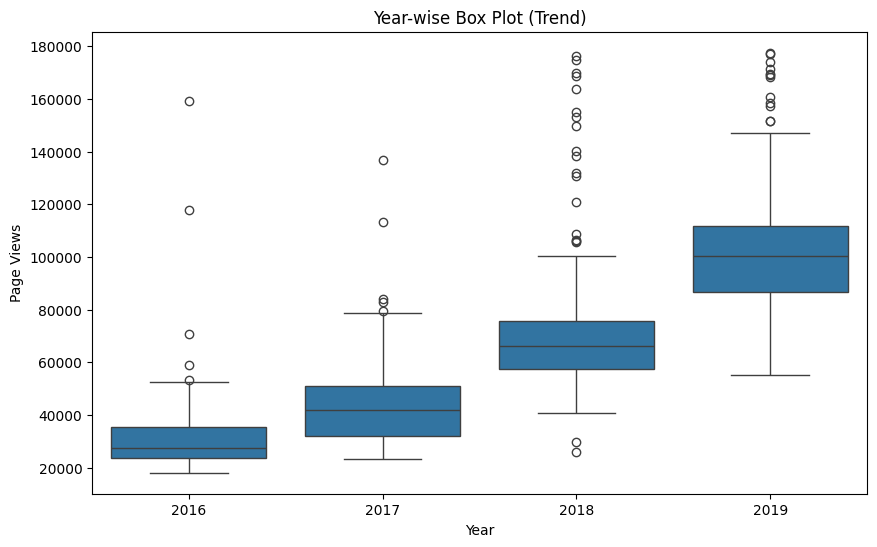

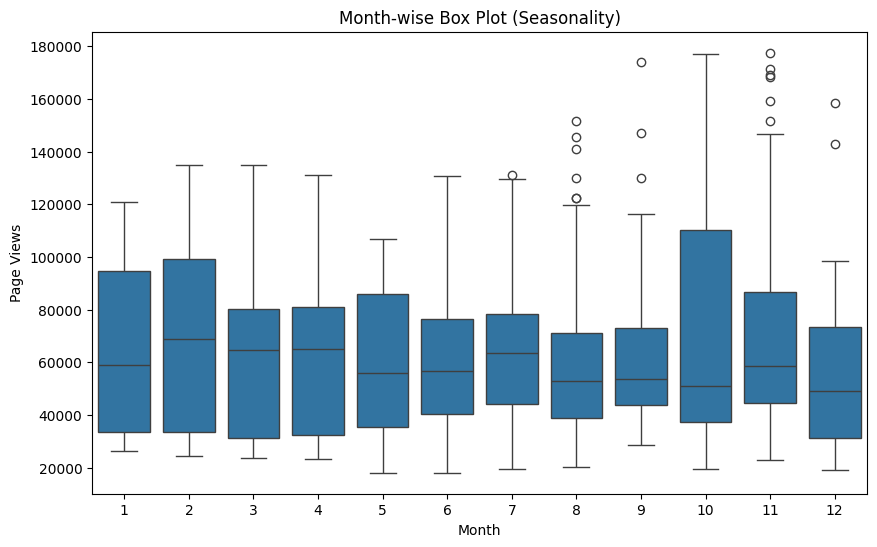

In [15]:
draw_box_plot()